# Efektivita marketingových akcí

## Načtení dat ze souboru

In [2]:
import pandas as pd # modul pro manipulaci s daty
df=pd.read_csv('./GOODS1n.csv', encoding='utf-8') #načtení dat ze souboru
display(df.head()) #náhled do datové matice

,Class,Cost,Promotion,Before,After
0,Confection,23.99,1467,114957,122762
1,Drink,79.29,1745,123378,137097
2,Luxury,81.99,1426,135246,141172
3,Confection,74.18,1098,231389,244456
4,Confection,90.09,1968,235648,261940


## Přetypování jednotlivých hodnot

In [3]:
df = df.astype({"Cost": float}, errors='raise') # přetypování ceny na desetiné číslo
df = df.astype({"Promotion": float}, errors='raise')# přetypování ceny na desetiné číslo
df = df.astype({"Before": float}, errors='raise')# přetypování ceny na desetiné číslo
df = df.astype({"After": float}, errors='raise')# přetypování ceny na desetiné číslo

## Přidání sloupce navýšení

In [4]:
df['Increase'] = (df['After']-df['Before'])/df['Before']*100 #vzorec pro výpočet navýšení
display(df.head()) #náhled do datové matice

,Class,Cost,Promotion,Before,After,Increase
0,Confection,23.99,1467.0,114957.0,122762.0,6.789495
1,Drink,79.29,1745.0,123378.0,137097.0,11.119486
2,Luxury,81.99,1426.0,135246.0,141172.0,4.381645
3,Confection,74.18,1098.0,231389.0,244456.0,5.647200
4,Confection,90.09,1968.0,235648.0,261940.0,11.157319


## Náhled do dat pomocí grafů

### Histogram navýšení 

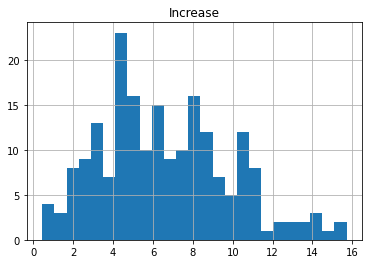

In [5]:
prom_hist = df.hist(column="Increase", bins=25) # histrogram slupce Increase rozdělený do 25 sloupců

### Graf promoce proti navýšení

In [6]:
import matplotlib.pyplot as plt

"""
Vykresluje graf(plot) dvou sloupců zabarvených podle třetího 
"""
def plot_columns(x_asis, y_axis,group_by):
    # fronta barev, abych nemusel řešit přiřazování barev konkrétním třídám
    color_queue = ['tab:pink','tab:purple','tab:brown','tab:blue','tab:orange', 'tab:green','tab:red']
    fig, ax = plt.subplots(figsize=(6, 4)) # vytvoření objektu držící grafy o velikosti 6 na 4
    grouped = df.groupby(group_by) #seskupení dat podle třídy
    for key, group in grouped: # procházím jednotlvé skupiny ze seskupení (key = název třídy, group = data třídy)
        #vykreslení každého grafu přes sebe, kde si každá třída vytáhne jednu barvu z fronty
        group.plot(ax=ax, kind='scatter', x=x_asis, y=y_axis, label=key, color=color_queue.pop())
    plt.show() #zobrazení grafu

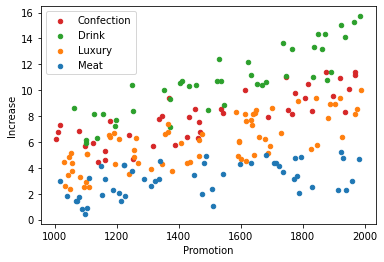

In [7]:
plot_columns('Promotion','Increase','Class') #vykreslení grafu

## Použití CART rozhodovacího stromu

### Příprava pomocných funkcí

In [11]:
from sklearn.model_selection import train_test_split # modul pro rozdělení na testovací a trénovací data
from sklearn import tree # modul pro vytváření modelů rozhodovacích stromů
import graphviz # modul pro vykreslení rozhodovacího stromu
import numpy as np # modul pro manipulaci s daty
from numpy import mean as avg # modul pro počítání průměrů

"""
Vytváří model regresního rozhodovacího stromu na záhladě předaných datech.

Vypisuje metriky daného modelu na daných datech.
"""
def fitting(X, y, splitter, mdepth, minleaf,test_size=0.2):

    # rozdělení dat na trénovací a testovací
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # vytvoření modelu, výchozí kritérium je "squared_error"
    model = tree.DecisionTreeRegressor( splitter=splitter, 
                                        max_depth=mdepth,
                                        min_samples_leaf=minleaf, 
                                        random_state=0)
    cart = model.fit(X_train, y_train) #trénování modelu
    
    y_pred_train = model.predict(X_train) #predikce na základě trénovacích dat
    y_pred_test = model.predict(X_test); #predikce na základě testovacích dat
    
    #výpis metrik modelu (kód se tu už opravdu komentuje sám)
    print('{:=^75}'.format('Shrnutí vlastnostní stromu'))
    print('{:<15}''{:<20}'.format('Hloubka stromu: ', cart.tree_.max_depth))
    print('{:<15}''{:<20}'.format('Počet listů: ', cart.tree_.n_leaves))
    print('{:<15}''{:<20}'.format('Počet proměnných: ', cart.n_features_in_))
    print('{:-^75}'.format('')) #ondělovač pro parádu
    print("")
    
    train_error = y_pred_train-y_train #výpočet chyby na trénovacích datech
    print('{:=^75}'.format('Vyhodnocení na trénovacích datech'))
    print('{:<25}''{:<20.3f}'.format('Přesnost: ', model.score(X_train, y_train)))
    print('{:<25}''{:<20.3f}'.format('Min chyba: ',min(train_error) ))
    print('{:<25}''{:<20.3f}'.format('Max chyba: ',max(train_error) ))
    print('{:<25}''{:<20.3f}'.format('Průměrná chyba: ',avg(train_error) ))
    print('{:<25}''{:<20.3f}'.format('Průměrná abs chyba: ',avg(abs(train_error))))
    print('{:<25}''{:<20.3f}'.format('Standardní odchylka: ',np.std((train_error))))
    print('{:<25}''{:<20.3f}'.format('Lineární korelace: ',np.corrcoef(y_pred_train, y_train)[0][1]))
    print('{:<25}''{:<20}'.format('Počet výskytů: ',len(y_pred_train)))
    print('{:-^75}'.format(''))#ondělovač pro parádu
    print("")
    
    test_error = y_pred_test-y_test #výpočet chyby na testovacích datech  
    print('{:=^75}'.format('Vyhodnocení na testovacých datech'))
    print('{:<25}''{:<20.3f}'.format('Přesnost: ', model.score(X_test, y_test)))
    print('{:<25}''{:<20.3f}'.format('Min chyba: ',min(test_error) ))
    print('{:<25}''{:<20.3f}'.format('Max chyba: ',max(test_error) ))
    print('{:<25}''{:<20.3f}'.format('Průměrná chyba: ',avg(test_error) ))
    print('{:<25}''{:<20.3f}'.format('Průměrná abs chyba: ',avg(abs(test_error))))
    print('{:<25}''{:<20.3f}'.format('Standardní odchylka: ',np.std((test_error))))
    print('{:<25}''{:<20.3f}'.format('Lineární korelace: ',np.corrcoef(y_pred_test, y_test)[0][1]))
    print('{:<25}''{:<20}'.format('Počet výskytů: ',len(y_pred_test)))
    print('{:-^75}'.format('')) #ondělovač pro parádu
    
    print('{:=^75}'.format('Vyhodnocení důležitosti promněnných'))
    print('{:<25}''{:<20}'.format('Promněnné:',str(list(X))))
    print('{:<25}''{:<20}'.format('Důležitost:',str(cart.feature_importances_)))
    print('{:-^75}'.format('')) #ondělovač pro parádu
    
    # příprava dat pro graphviz
    dot_data = tree.export_graphviz(cart, out_file=None, 
                                feature_names=X.columns, 
                                filled=True, 
                                rounded=True, 
                                #rotate=True,
                               ) 
    graph = graphviz.Source(dot_data) # stále příprava dat pro graphviz
    
    return X_train, X_test, y_train, y_test, cart, graph

In [ ]:
"""
Převádí nominální data na ordinální(numerická) v nějakém sloupci a přidává je jako nový sloupec
"""
def Convert_column_to_numeric(df,column_name):
    class_to_num_dict = {} #příprava slovníku převodu
    
    new_column=[] #vytvoření seznamu pro data nového sloupce
    for c in df[column_name]: # prochází se všechny řádky ve daném sloupci
        if c not in class_to_num_dict: 
            class_to_num_dict[c]=len(class_to_num_dict) # pokud údaj není ve slovníku, přiřadí se mu nové číslo
        new_column.append(class_to_num_dict[c]) #zakódování nominálního údaje a přidání do nového sloupce
    df['num_'+column_name] = new_column #přidání nového sloupce do datové matice
    return class_to_num_dict

### Příprava dat

In [10]:
# převod nominální kategorické promněnné Class na numerickou hodnotu v novém sloupci
class_to_num_dict = Convert_column_to_numeric(df,'Class') 
display(df.head()) #náhled do datové matice

,Class,Cost,Promotion,Before,After,Increase,num_Class
0,Confection,23.99,1467.0,114957.0,122762.0,6.789495,0
1,Drink,79.29,1745.0,123378.0,137097.0,11.119486,1
2,Luxury,81.99,1426.0,135246.0,141172.0,4.381645,2
3,Confection,74.18,1098.0,231389.0,244456.0,5.647200,0
4,Confection,90.09,1968.0,235648.0,261940.0,11.157319,0


### Spuštění trénování modelu

========================Shrnutí vlastnostní stromu=========================
Hloubka stromu: 5                   
Počet listů:   31                  
Počet proměnných: 2                   
---------------------------------------------------------------------------

=====================Vyhodnocení na trénovacích datech=====================
Přesnost:                0.910               
Min chyba:               -2.223              
Max chyba:               1.998               
Průměrná chyba:          -0.000              
Průměrná abs chyba:      0.800               
Standardní odchylka:     0.969               
Lineární korelace:       0.954               
Počet výskytů:           160                 
---------------------------------------------------------------------------

=====================Vyhodnocení na testovacých datech=====================
Přesnost:                0.796               
Min chyba:               -2.495              
Max chyba:               2.940               


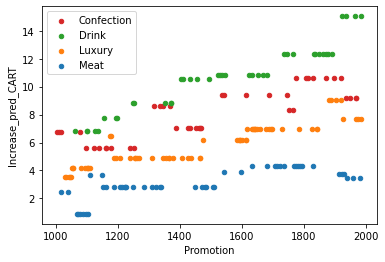

,Class,Cost,Promotion,Before,After,Increase,num_Class,Increase_pred_CART
0,Confection,23.99,1467.0,114957.0,122762.0,6.789495,0,7.043339
1,Drink,79.29,1745.0,123378.0,137097.0,11.119486,1,12.368646
2,Luxury,81.99,1426.0,135246.0,141172.0,4.381645,2,4.874983
3,Confection,74.18,1098.0,231389.0,244456.0,5.647200,0,5.608926
4,Confection,90.09,1968.0,235648.0,261940.0,11.157319,0,9.208344


In [11]:
X=df[['num_Class', 'Promotion']] # vývěr relevantních vstupních dat pro trénování
y=df['Increase'].values # určení cílové výstupní promněnné 

# trénování modelu a zobrazení metrik
X_train, X_test, y_train, y_test, cart, graph = fitting(X, #trénovací data
                                                       y, #cílová promněná
                                                       'best', #strategie rozdělování 
                                                       mdepth=5, #maximální hloubka stromu 
                                                       minleaf=2) #minimální počet vzorků v listu)
df['Increase_pred_CART']=cart.predict(X) #přidání predikcí modelem do datové matice
plot_columns('Promotion','Increase_pred_CART','Class') #vykreslení grafu 
display(df.head()) #náhled do datové matice

In [12]:
#graph #toto mělo vykreslit rozhodovací strom, ale nějak to nefunguje, nedaří se spuštění 

## Použití lineární regrese

### Příprava dat

In [13]:
# převedení Class na flag v novém sloupci pro každou třídu
df['Class_Confection'] = df['Class']=='Confection'
df['Class_Drink'] = df['Class']=='Drink'
df['Class_Luxury'] = df['Class']=='Luxury'
df['Class_Meat'] = df['Class']=='Meat'
# Jelikož jsou třídy jen 4, nastavil jsem to takto narychlo "natvrdo". Kdyby bylo tříd víc, zautomatizoval bych to.

display(df.head()) #náhled do datové matice

,Class,Cost,Promotion,Before,After,Increase,num_Class,Increase_pred_CART,Class_Confection,Class_Drink,Class_Luxury,Class_Meat
0,Confection,23.99,1467.0,114957.0,122762.0,6.789495,0,7.043339,True,False,False,False
1,Drink,79.29,1745.0,123378.0,137097.0,11.119486,1,12.368646,False,True,False,False
2,Luxury,81.99,1426.0,135246.0,141172.0,4.381645,2,4.874983,False,False,True,False
3,Confection,74.18,1098.0,231389.0,244456.0,5.647200,0,5.608926,True,False,False,False
4,Confection,90.09,1968.0,235648.0,261940.0,11.157319,0,9.208344,True,False,False,False


In [14]:
"""
Upříme nevímpřesně, proč přidání těchto sloupců má ten efekt, který to má. Jejich přidáním se umožní trénování
lineární regrese všech 4 tříd zároveň bez jejich promíchání.

Alternativou je vytřídit data podle každé třídy na 4 části a na každou natrénovat vlastní lineární regresi a
při použití v praxi by se musel zvolit vhodný model na základě třídy. 
"""
# stejně jako u Class flags, ale tentokrát hodnota Promotion a 0 místo True a FAlse 
df['Class_Confection_Inter'] = df['Promotion'] * df['Class_Confection']
df['Class_Drink_Inter'] = df['Promotion'] * df['Class_Drink']
df['Class_Luxury_Inter'] = df['Promotion'] * df['Class_Luxury']
df['Class_Confection_Meat'] = df['Promotion'] * df['Class_Meat']

display(df.head()) #náhled do datové matice

,Class,Cost,Promotion,Before,After,Increase,num_Class,Increase_pred_CART,Class_Confection,Class_Drink,Class_Luxury,Class_Meat,Class_Confection_Inter,Class_Drink_Inter,Class_Luxury_Inter,Class_Confection_Meat
0,Confection,23.99,1467.0,114957.0,122762.0,6.789495,0,7.043339,True,False,False,False,1467.0,0.0,0.0,0.0
1,Drink,79.29,1745.0,123378.0,137097.0,11.119486,1,12.368646,False,True,False,False,0.0,1745.0,0.0,0.0
2,Luxury,81.99,1426.0,135246.0,141172.0,4.381645,2,4.874983,False,False,True,False,0.0,0.0,1426.0,0.0
3,Confection,74.18,1098.0,231389.0,244456.0,5.647200,0,5.608926,True,False,False,False,1098.0,0.0,0.0,0.0
4,Confection,90.09,1968.0,235648.0,261940.0,11.157319,0,9.208344,True,False,False,False,1968.0,0.0,0.0,0.0


### Příprava pomocných funkcí

In [15]:
from sklearn.linear_model import LinearRegression # modul s implementací lineární regrese
from sklearn.model_selection import train_test_split # modul pro rozdělení na testovací a trénovací data

"""
Vytváří model linéární regrese na záhladě předaných datech.

Vypisuje metriky daného modelu na daných datech.
"""

def fitting_linear_reg(X,y, test_size=0.2):
    # rozdělení dat na trénovací a testovací
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    model = LinearRegression() #vytnoření modelu
    lin_reg = model.fit(X_train, y_train) # trénování modelu
    
    y_pred_train = model.predict(X_train) #predikce na základě trénovacích dat
    y_pred_test = model.predict(X_test); #predikce na základě testovacích dat
        
    train_error = y_pred_train-y_train #výpočet chyby na trénovacích datech
    print('{:=^75}'.format('Vyhodnocení na trénovacích datech'))
    print('{:<25}''{:<20.3f}'.format('Přesnost: ', model.score(X_train, y_train)))
    print('{:<25}''{:<20.3f}'.format('Min chyba: ',min(train_error) ))
    print('{:<25}''{:<20.3f}'.format('Max chyba: ',max(train_error) ))
    print('{:<25}''{:<20.3f}'.format('Průměrná chyba: ',avg(train_error) ))
    print('{:<25}''{:<20.3f}'.format('Průměrná abs chyba: ',avg(abs(train_error))))
    print('{:<25}''{:<20.3f}'.format('Standardní odchylka: ',np.std((train_error))))
    print('{:<25}''{:<20.3f}'.format('Lineární korelace: ',np.corrcoef(y_pred_train, y_train)[0][1]))
    print('{:<25}''{:<20}'.format('Počet výskytů: ',len(y_pred_train)))
    print('{:-^75}'.format(''))#ondělovač pro parádu
    print("")
    
    test_error = y_pred_test-y_test #výpočet chyby na testovacích datech  
    print('{:=^75}'.format('Vyhodnocení na testovacých datech'))
    print('{:<25}''{:<20.3f}'.format('Přesnost: ', model.score(X_test, y_test)))
    print('{:<25}''{:<20.3f}'.format('Min chyba: ',min(test_error) ))
    print('{:<25}''{:<20.3f}'.format('Max chyba: ',max(test_error) ))
    print('{:<25}''{:<20.3f}'.format('Průměrná chyba: ',avg(test_error) ))
    print('{:<25}''{:<20.3f}'.format('Průměrná abs chyba: ',avg(abs(test_error))))
    print('{:<25}''{:<20.3f}'.format('Standardní odchylka: ',np.std((test_error))))
    print('{:<25}''{:<20.3f}'.format('Lineární korelace: ',np.corrcoef(y_pred_test, y_test)[0][1]))
    print('{:<25}''{:<20}'.format('Počet výskytů: ',len(y_pred_test)))
    print('{:-^75}'.format('')) #ondělovač pro parádu
    return X_train, X_test, y_train, y_test, lin_reg

### Spuštění trénování modelu

=====================Vyhodnocení na trénovacích datech=====================
Přesnost:                0.860               
Min chyba:               -2.135              
Max chyba:               2.283               
Průměrná chyba:          0.000               
Průměrná abs chyba:      1.043               
Standardní odchylka:     1.207               
Lineární korelace:       0.927               
Počet výskytů:           160                 
---------------------------------------------------------------------------

=====================Vyhodnocení na testovacých datech=====================
Přesnost:                0.867               
Min chyba:               -2.006              
Max chyba:               1.949               
Průměrná chyba:          -0.009              
Průměrná abs chyba:      1.129               
Standardní odchylka:     1.271               
Lineární korelace:       0.932               
Počet výskytů:           40                  
-----------------------------------

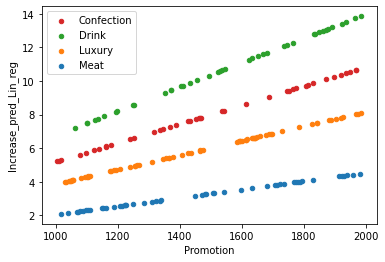

,Class,Cost,Promotion,Before,After,Increase,num_Class,Increase_pred_CART,Class_Confection,Class_Drink,Class_Luxury,Class_Meat,Class_Confection_Inter,Class_Drink_Inter,Class_Luxury_Inter,Class_Confection_Meat,Increase_pred_Lin_reg
0,Confection,23.99,1467.0,114957.0,122762.0,6.789495,0,7.043339,True,False,False,False,1467.0,0.0,0.0,0.0,7.814003
1,Drink,79.29,1745.0,123378.0,137097.0,11.119486,1,12.368646,False,True,False,False,0.0,1745.0,0.0,0.0,12.136887
2,Luxury,81.99,1426.0,135246.0,141172.0,4.381645,2,4.874983,False,False,True,False,0.0,0.0,1426.0,0.0,5.694759
3,Confection,74.18,1098.0,231389.0,244456.0,5.647200,0,5.608926,True,False,False,False,1098.0,0.0,0.0,0.0,5.739467
4,Confection,90.09,1968.0,235648.0,261940.0,11.157319,0,9.208344,True,False,False,False,1968.0,0.0,0.0,0.0,10.630651


In [16]:
# vývěr relevantních vstupních dat pro trénování
X=df[['Promotion', 'Class_Confection_Inter','Class_Drink_Inter','Class_Luxury_Inter', 'Class_Confection_Meat']]
y=df['Increase'].values # určení cílové výstupní promněnné 

X_train, X_test, y_train, y_test, lin_reg = fitting_linear_reg(X,y) # trénování modelu a zobrazení metrik

df['Increase_pred_Lin_reg']=lin_reg.predict(X)  #přidání predikcí modelem do datové matice
plot_columns('Promotion','Increase_pred_Lin_reg','Class') #vykreslení grafu 
display(df.head()) #náhled do datové matice

In [17]:
# zobrazení podle mě nejzajímavějších částí datové matice
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[['Class', 'Promotion','Increase','Increase_pred_CART', 'Increase_pred_Lin_reg']])


,Class,Promotion,Increase,Increase_pred_CART,Increase_pred_Lin_reg
0,Confection,1467.0,6.789495,7.043339,7.814003
1,Drink,1745.0,11.119486,12.368646,12.136887
2,Luxury,1426.0,4.381645,4.874983,5.694759
3,Confection,1098.0,5.647200,5.608926,5.739467
4,Confection,1968.0,11.157319,9.208344,10.630651
5,Meat,1486.0,4.934681,2.803952,3.252104
6,Meat,1248.0,3.782321,2.803952,2.661805
7,Luxury,1364.0,6.795660,4.874983,5.428311
8,Luxury,1585.0,8.296318,6.163579,6.378069
9,Drink,1835.0,13.312846,12.368646,12.785219
